In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2025-10-10 04:04:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.227.27, 18.65.227.110, 18.65.227.25, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.227.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.04s   

2025-10-10 04:04:58 (53.9 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

**`1. Bar chart - Categorical data. (Name)`**

In [13]:
data = pd.read_csv('final_vg.csv')
col = 'Name'

In [14]:
cat_counts = data['Name'].value_counts()
cat_counts

,count
Name,
Ice Hockey,41
Baseball,17
Need for Speed: Most Wanted,12
Ratatouille,9
FIFA 14,9
...,...
Indy Racing 2000,1
Indycar Series 2005,1
inFAMOUS,1


Frequency and percentage of each category

In [15]:
cat_counts = data[col].value_counts()
cat_percent = data[col].value_counts(normalize=True) * 100

In [16]:
summary = pd.DataFrame({'Count': cat_counts, 'Percentage': cat_percent.round(2)})
print("\nFrequency and Percentage Table:")
print(summary.head())


Frequency and Percentage Table:
                             Count  Percentage
Name                                          
Ice Hockey                      41        0.25
Baseball                        17        0.10
Need for Speed: Most Wanted     12        0.07
Ratatouille                      9        0.05
FIFA 14                          9        0.05


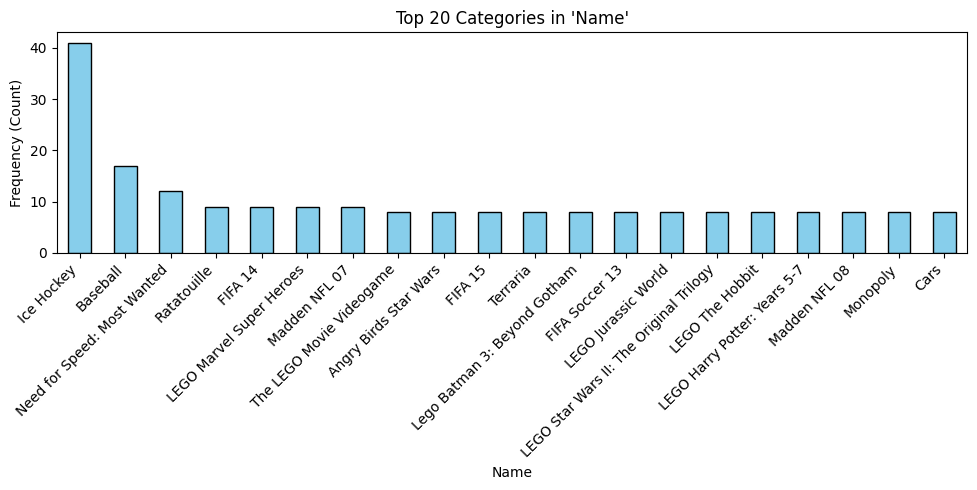

In [20]:
cat_counts = data[col].value_counts()

plt.figure(figsize=(10,5))
cat_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title(f"Top 20 Categories in '{col}'")
plt.xlabel(col)
plt.ylabel("Frequency (Count)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**`2. Pie Chart - Categorical data.`**

Question: Proportion of each category in name column.

Question: What percentage of total entries does each 'Name' category represent?

Answer (top 10 shown):
Name
Ice Hockey                     0.246217
Baseball                       0.102090
Need for Speed: Most Wanted    0.072063
Ratatouille                    0.054048
FIFA 14                        0.054048
LEGO Marvel Super Heroes       0.054048
Madden NFL 07                  0.054048
The LEGO Movie Videogame       0.048042
Angry Birds Star Wars          0.048042
FIFA 15                        0.048042
Name: proportion, dtype: float64


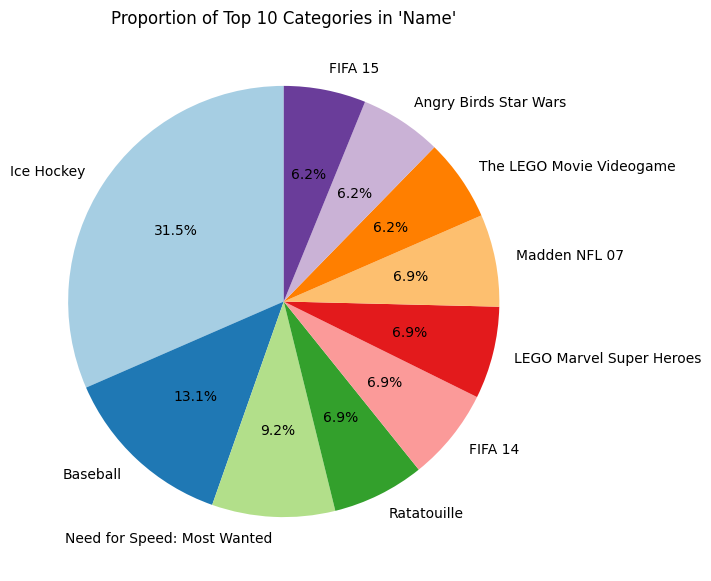

In [18]:
cat_percent = data[col].value_counts(normalize=True) * 100

print(f"Question: What percentage of total entries does each '{col}' category represent?")
print("\nAnswer (top 10 shown):")
print(cat_percent.head(10))

# Plotting pie chart (top 10 categories for readability)
plt.figure(figsize=(7,7))
cat_percent.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f"Proportion of Top 10 Categories in '{col}'")
plt.ylabel("")  # remove y-axis label for cleaner look
plt.show()

**`3. Histogram - Numerical data.`**

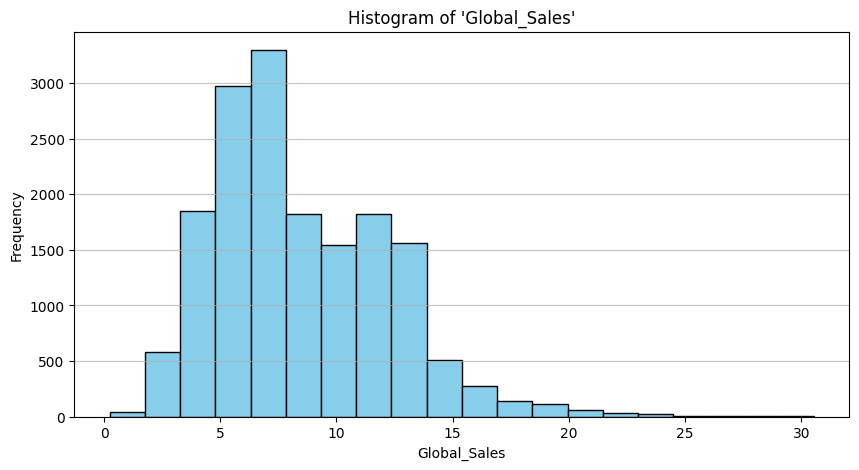

In [21]:
# Load dataset
data = pd.read_csv('final_vg.csv')

# Select numeric column
col_num = 'Global_Sales'

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(data[col_num].dropna(), bins=20, color='skyblue', edgecolor='black')  # 20 bins for better detail

plt.title(f"Histogram of '{col_num}'")
plt.xlabel(col_num)
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

we need to use the log scale if values are very skewed:

(array([4.000e+01, 5.810e+02, 1.845e+03, 2.977e+03, 3.297e+03, 1.820e+03,
        1.546e+03, 1.825e+03, 1.558e+03, 5.070e+02, 2.720e+02, 1.410e+02,
        1.150e+02, 5.700e+01, 3.000e+01, 2.200e+01, 8.000e+00, 8.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.24      ,  1.75579309,  3.27158619,  4.78737928,  6.30317237,
         7.81896547,  9.33475856, 10.85055165, 12.36634474, 13.88213784,
        15.39793093, 16.91372402, 18.42951712, 19.94531021, 21.4611033 ,
        22.9768964 , 24.49268949, 26.00848258, 27.52427567, 29.04006877,
        30.55586186]),
 <BarContainer object of 20 artists>)

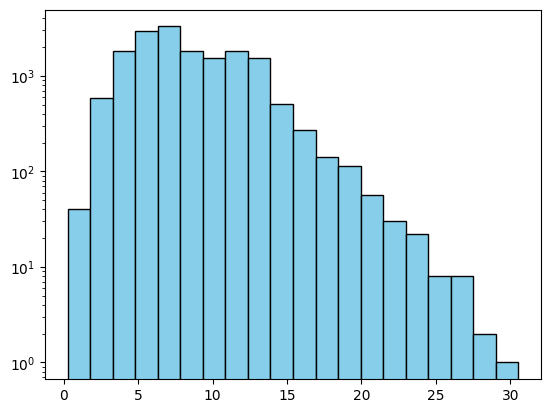

In [22]:
plt.hist(data[col_num].dropna(), bins=20, color='skyblue', edgecolor='black', log=True)


Density instead of count.

Text(0, 0.5, 'Density')

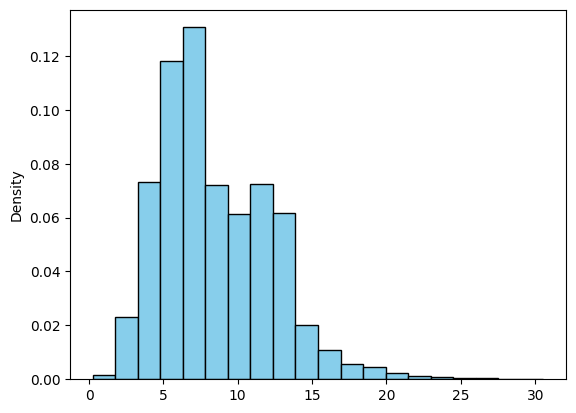

In [23]:
plt.hist(data[col_num].dropna(), bins=20, color='skyblue', edgecolor='black', density=True)
plt.ylabel("Density")

**`4. Boxplot`**

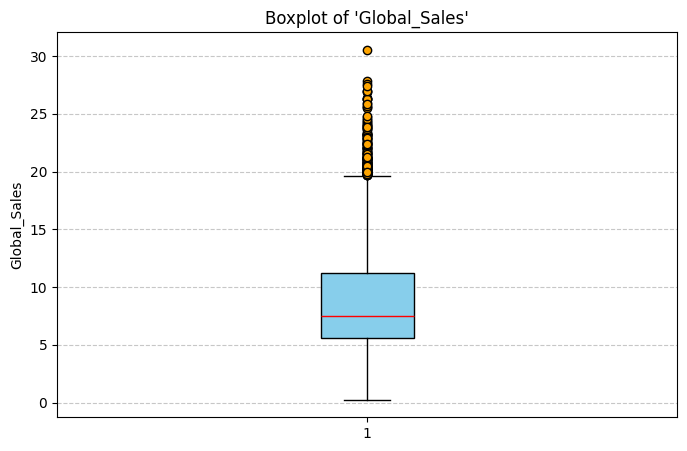

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('final_vg.csv')

# Select numeric column
col_num = 'Global_Sales'

# Plot boxplot
plt.figure(figsize=(8,5))
plt.boxplot(data[col_num].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='black'))

plt.title(f"Boxplot of '{col_num}'")
plt.ylabel(col_num)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


here, in the above, there are more outliers. So, we will plot for another feature.

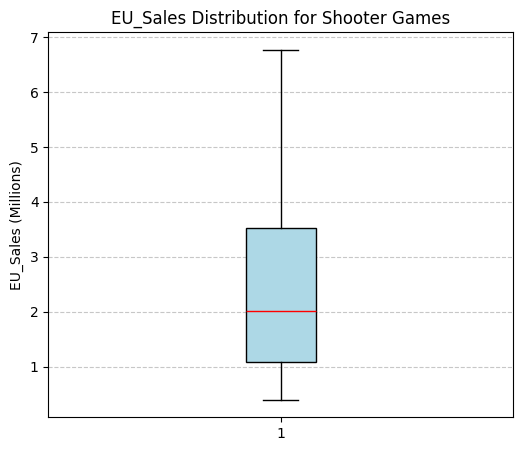

In [30]:
# Load dataset
data = pd.read_csv('final_vg.csv')

# Filter for Shooter genre
shooter_data = data[data['Genre'] == 'Shooter']

# Numeric column
col_num = 'EU_Sales'

# Plot boxplot
plt.figure(figsize=(6,5))
plt.boxplot(shooter_data[col_num].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='black'))

plt.title("EU_Sales Distribution for Shooter Games")
plt.ylabel("EU_Sales (Millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**`5. KDE Plot.`**

/tmp/ipython-input-4145132190.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col_num].dropna(), shade=True, color='skyblue', bw_adjust=1)


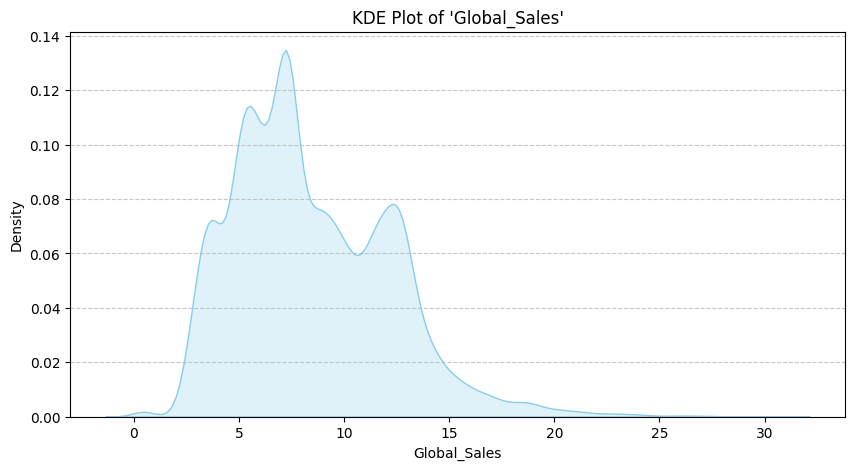

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn makes KDE plotting very easy

# Load dataset
data = pd.read_csv('final_vg.csv')

# Select numeric column
col_num = 'Global_Sales'

# Plot KDE
plt.figure(figsize=(10,5))
sns.kdeplot(data[col_num].dropna(), shade=True, color='skyblue', bw_adjust=1)

plt.title(f"KDE Plot of '{col_num}'")
plt.xlabel(col_num)
plt.ylabel("Density")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
